In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [3]:
X

array([[-1.92009296, -1.36160285],
       [-0.26987056,  0.09596979],
       [-0.74791636, -1.61933302],
       ...,
       [-1.79808832,  1.51900835],
       [ 5.74248225, -2.6953532 ],
       [ 4.43985058, -2.31979305]])

In [4]:
y

array([1, 1, 1, 0, 0, 0, 1, 2, 1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 1, 1, 2, 1,
       1, 0, 0, 0, 0, 2, 0, 1, 2, 1, 2, 0, 0, 1, 0, 1, 0, 1, 1, 2, 1, 1,
       1, 0, 2, 0, 1, 0, 2, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 2, 1, 2, 1,
       1, 1, 2, 1, 1, 0, 1, 2, 1, 0, 2, 1, 0, 2, 1, 1, 2, 1, 0, 0, 0, 0,
       2, 2, 2, 1, 2, 0, 2, 0, 1, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 1, 1, 2,
       2, 1, 2, 0, 1, 0, 2, 2, 2, 0, 1, 1, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 2, 0, 2, 2, 1, 0, 0, 2,
       0, 0, 1, 0, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 0, 2, 1, 2, 0, 2, 2,
       0, 1, 0, 0, 2, 1, 2, 0, 2, 2, 1, 0, 1, 0, 1, 1, 2, 0, 2, 1, 0, 1,
       1, 0, 2, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 0, 2,
       2, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 2, 2, 1, 2,
       0, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 2, 0, 0, 1, 1, 2, 2,
       2, 2, 1, 0, 2, 0, 2, 1, 1, 0, 0, 2, 1, 0, 2, 1, 2, 2, 1, 0, 2, 0,
       0, 2, 2, 1, 2, 2, 1, 1, 0, 2, 2, 0, 1, 1, 1,

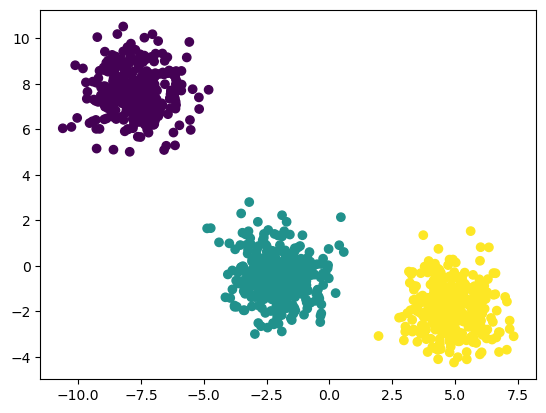

In [6]:
plt.scatter(X[:,0],X[:,1], c=y)

In [7]:
# standardization--feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [10]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [11]:
from sklearn.cluster import KMeans

In [13]:
#Elbow method to select K value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)


/Users/nithyasreekusakula/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nithyasreekusakula/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nithyasreekusakula/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nithyasreekusakula/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarni

In [14]:
wcss

[1339.9999999999995,
 256.3918650783476,
 59.55427972229873,
 50.80140216395969,
 42.69136056466565,
 35.31638515721036,
 31.486909336775938,
 27.782124838734212,
 24.972075635442984,
 22.799074162650104]

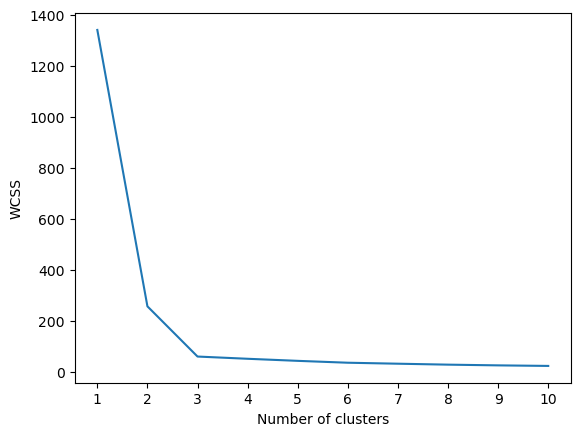

In [15]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [16]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [17]:
kmeans.fit_predict(X_train_scaled)

/Users/nithyasreekusakula/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 1, 1, 1, 2, 2, 0, 1, 1, 1, 0, 2, 1, 1, 0, 0, 0, 2, 1, 2, 2, 0,
       1, 2, 1, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 2, 0,
       2, 2, 2, 1, 2, 0, 1, 2, 2, 0, 1, 0, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2,
       0, 1, 0, 2, 0, 0, 2, 0, 2, 2, 2, 1, 0, 2, 2, 1, 1, 1, 1, 0, 2, 2,
       2, 0, 2, 1, 0, 2, 1, 2, 2, 0, 0, 2, 0, 2, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 2, 1, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0,
       2, 2, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 2, 0, 0, 1, 0, 1, 0, 1, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 2, 0, 1, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 0, 1, 1, 1, 2, 2, 0, 1, 2, 0, 0, 1, 2, 2, 1, 0, 2, 2, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 2, 1, 2, 2, 0, 2, 1, 0, 2, 2, 0, 1,
       1, 2, 0, 0, 0, 2, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 0, 0, 1, 2, 1, 2,
       2, 1, 1, 0, 2, 2, 0, 2, 1, 2, 1, 2, 0, 2, 1, 1, 0, 1, 1, 0, 2, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 2, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 2, 0, 2, 2, 0, 1, 2, 1, 0, 0, 1,

In [18]:
y_pred=kmeans.predict(X_test_scaled)

In [19]:
y_pred

array([2, 2, 0, 1, 2, 2, 1, 2, 0, 2, 1, 1, 1, 2, 0, 2, 1, 1, 0, 0, 2, 1,
       0, 2, 0, 0, 0, 2, 2, 1, 1, 0, 1, 1, 1, 2, 1, 0, 2, 0, 0, 2, 0, 2,
       2, 0, 1, 1, 2, 0, 1, 0, 2, 0, 0, 1, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1,
       2, 1, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 0, 1, 1, 2,
       0, 0, 0, 1, 1, 0, 2, 1, 1, 1, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 1, 0,
       0, 0, 1, 2, 0, 0, 1, 0, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 0,
       1, 2, 2, 0, 2, 2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       2, 0, 1, 0, 2, 0, 2, 1, 2, 1, 2, 0, 2, 1, 2, 2, 0, 0, 1, 1, 2, 1,
       2, 0, 2, 2, 2, 2, 2, 1, 1, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2, 1,
       2, 0, 2, 2, 1, 1, 0, 0, 2, 0, 1, 1, 2, 0, 1, 0, 2, 1, 2, 0, 2, 0,
       1, 2, 0, 0, 2, 2, 2, 0, 2, 1, 1, 0, 1, 1, 0, 2, 0, 0, 1, 2, 0, 0,
       2, 2, 2, 1, 0, 2, 0, 0, 1, 2, 1, 2, 0, 1, 0, 0, 1, 0, 2, 2, 1, 2,
       0, 0, 2, 0, 2, 1, 0, 1, 1, 0, 2, 1, 0, 1, 2, 2, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 2, 2, 2, 2, 0, 1, 1, 0, 2, 1, 0, 1,

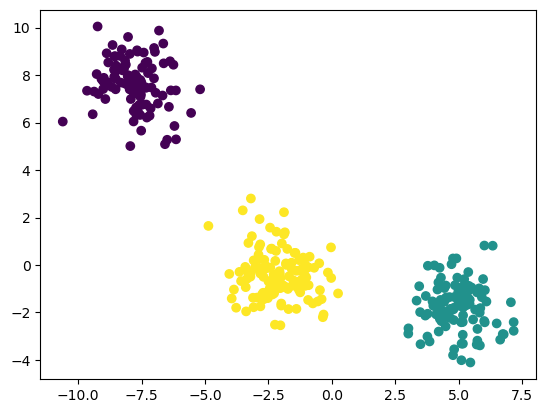

In [20]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [21]:
!pip install kneed

  Obtaining dependency information for kneed from https://files.pythonhosted.org/packages/9a/1b/7e726d8616e813007874468c61790099ba21493e0ea07561b7d9fc53151c/kneed-0.8.5-py3-none-any.whl.metadata


In [22]:
from kneed import KneeLocator

In [25]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [26]:
kl.elbow

3

In [27]:
from sklearn.metrics import silhouette_score

In [29]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

/Users/nithyasreekusakula/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nithyasreekusakula/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nithyasreekusakula/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nithyasreekusakula/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarni

In [30]:
silhouette_coefficients

[0.7300470738522333,
 0.7589603972048806,
 0.6378126597241472,
 0.47915562308491455,
 0.36269509691169743,
 0.3660210229163352,
 0.3612304656429689,
 0.35685048079949633,
 0.3521292937953965]

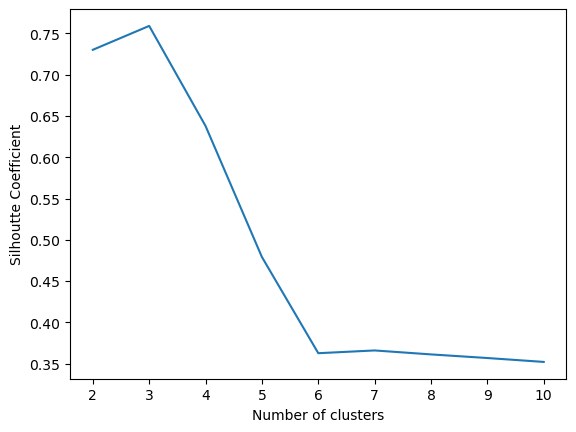

In [31]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("Silhoutte Coefficient")
plt.show()